In [107]:
%%shell 
jupyter nbconvert --to html /content/MIE1628_A5.ipynb

[NbConvertApp] Converting notebook /content/MIE1628_A5.ipynb to html
[NbConvertApp] Writing 4364927 bytes to /content/MIE1628_A5.html


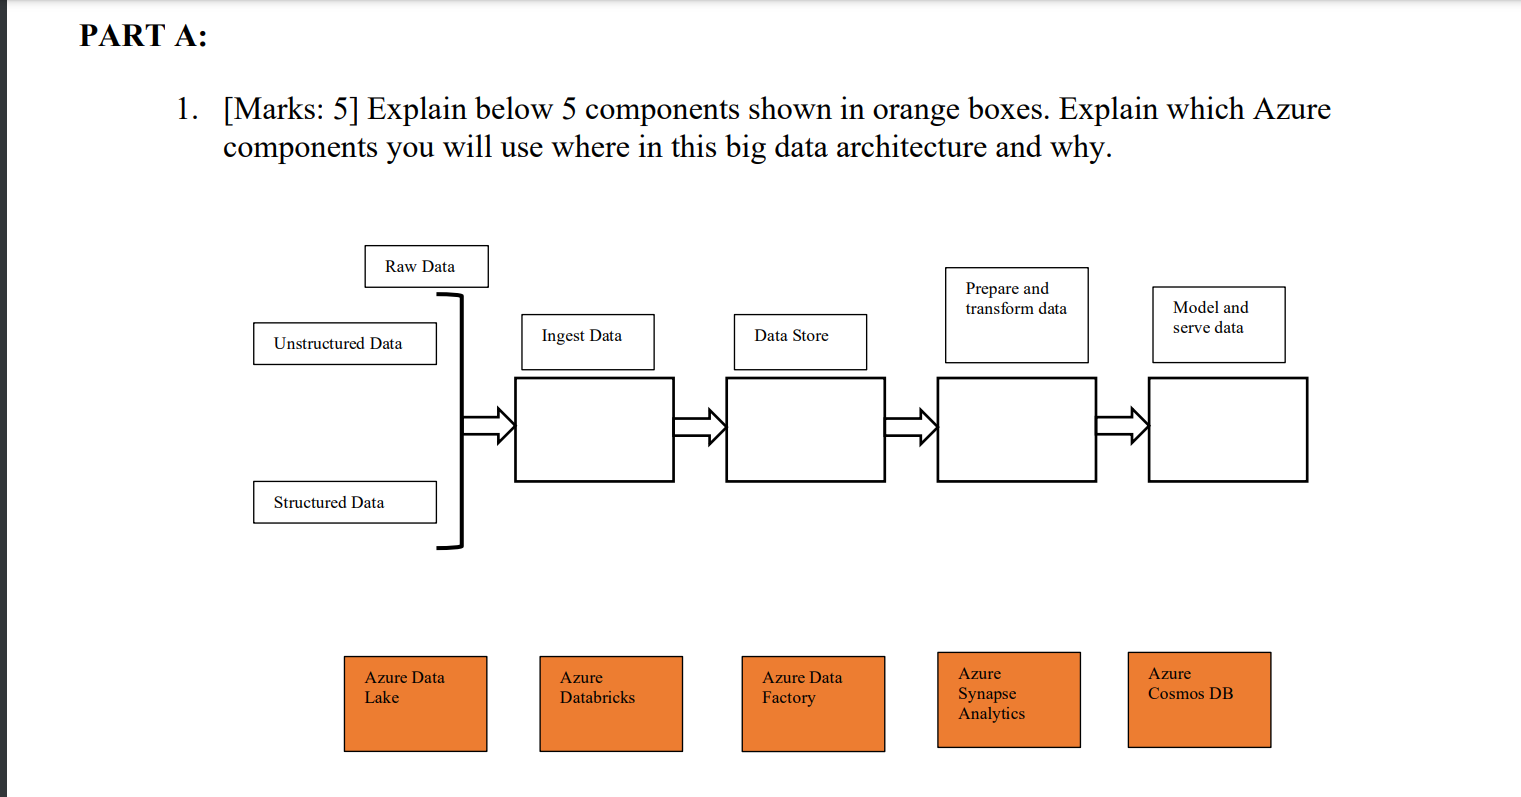

Explanation of all 5 boxes: 

1. **Azure Data Lake** - Azure Data Lake is a scalable data storage service. ADL includes all the capabilities required to make it easy for developers, data scientists, and analysts to store data of any size, shape, and speed, and do all types of processing and analytics across platforms and languages. 

2. **Azure Data Bricks** - Azure Data Bricks is offered as PaaS by Microsoft which is built on top of the free Apache Spark and supports other languages such as Python etc. ADB allows us spins up clusters instantly and it further integrates with other Azure services such as Azure ML, Big Data, Power BI etc. 

3. **Azure Data Factory** - Azure Data Factory is the platform that solves such data scenarios. It is the cloud-based ETL and data integration service that allows you to create data-driven workflows for orchestrating data movement and transforming data at scale. Using Azure Data Factory, you can create and schedule data-driven workflows (called pipelines) that can ingest data from disparate data stores. You can build complex ETL processes that transform data visually with data flows or by using compute services such as Azure HDInsight Hadoop, Azure Databricks, and Azure SQL Database.

4. **Azure Synapse Analytics** - Azure Synapse Analytics is a limitless analytics service that brings together data integration, enterprise data warehousing and big data analytics. It gives you the freedom to query data on your terms, using either serverless or dedicated options – at scale. Azure Synapse brings these worlds together with a unified experience to ingest, explore, prepare, transform, manage and serve data for immediate BI and machine learning needs.

5. **Azure Cosmos DB** - Cosmos Database (DB) is a globally distributed, low latency, multi-model ( key-value, graph, document,column) database for managing data at large scales. It is a cloud-based NoSQL database offered as a PaaS (Platform as a Service) from Microsoft Azure. It is a highly available, high throughput, reliable database and is often called a serverless database. Cosmos database contains the Azure Document DB and is available everywhere.

**Which blocks will go where ?** 

1. Ingest Data -> Azure Data Factory : This allows us to use lift and shift the data to cloud there are few options like copy to blob storage. User can create automated pipelines and create triggers to execute the pipelines as when required. So good example use case it when we get raw data on a daily basis, we can create automated triggers to run and ingest the data.

2. Data Storage -> Azure Data Storage : As described above, ADL is a scalable data storage service, once ADF is used to ingest the data, we need a place to store data and ADL is perfect place to keep small-large amounts of data. One good benefit of ADL is we can storage different types of data such as text, logs, video, document etc.

3. Prepare and Transform Data -> Azure DataBricks : One we have ingested raw data, we need to derive meaningful insights from the data and before that might have do some pre-processing such as ETL/ELT, perform data manipulation etc. For these purpose Azure DataBricks is peferred due to its support on Big Data solutions as Pyspark, MLLib etc. Another option to peform ELT/ELT options can be also be done via Azure Data Factory. Hence even Azure Data Factory could be a good fit in these case. However at these stage we would ideally want to perform some visulzations, perform data manipulations, combine data etc and as such Azure DataBricks would be more preffered option in this case.




4. Model and Serve Data : In my opinion we have two blocks in this case as explained below 

i ) Azure Synapse Analytics : SaaS offered by MS which provides and end to end datawarehouse capabilities. Synapse is more of a unified world where we can perform ingestion, explorations, ETL/ELT and serve data for Business Intelligence and Machine learning needs. However in this case, Synapse will integrate with Databricks ETL/ELT and provide data insights and ML capabilities. 

ii) Azure Cosmos DB : Once we perform all the analytics on the organized data, there might be a requirement that data should stored in a structured way to cater to the real world. For e.g This could be storing of logs of a deployed web application. A developer might be interested in looking at the logs received to monitor the application. Other use cases could be like to insert a new row of data whenever a sensor reading is there and alert the user. The user can check the logs of of sensor reading of last 1hr to understand what has happened. Hence Azure Cosmos DB would be good fit to serve the data to the user in a desriable way.  





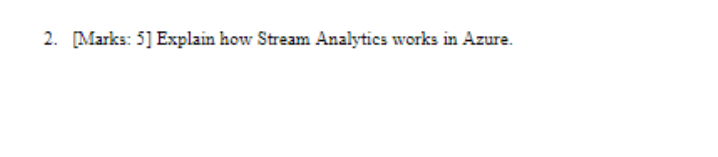

Azure Stream Analytics is a fully managed stream processing engine that is designed to analyze and process large volumes of streaming data with sub-millisecond latencies. Patterns and relationships can be identified in data that originates from a variety of input sources including applications, devices, sensors, clickstreams, and social media feeds. These patterns can be used to trigger actions and initiate workflows such as creating alerts, feeding information to a reporting tool, or storing transformed data for later use.

An Azure Stream Analytics job consists of an input, query, and an output.
It ingests data from Azure Event Hubs, Azure IoT Hub, or Azure Blob Storage.
 

*   An Azure Stream Analytics job consists of an input, query, and an output.


*   The input data can be from IoT device, weblogs, webclick or any other real time streaming data.
*   It ingests data from Azure Event Hubs, Azure IoT Hub, or Azure Blob Storage.
*   The query is based on SQL query language and can be used to easily filter, sort, aggregate, and join streaming data.


*   The output can be use to integrate with SQL DB, Cosmos DB, Power BI and other Azure Services 
 




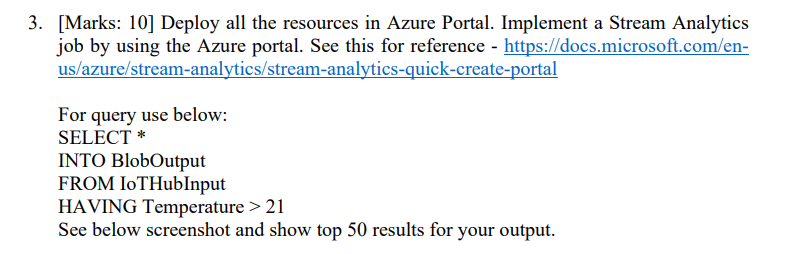

**IOT RESOURCE GROUP DEPLOYED**

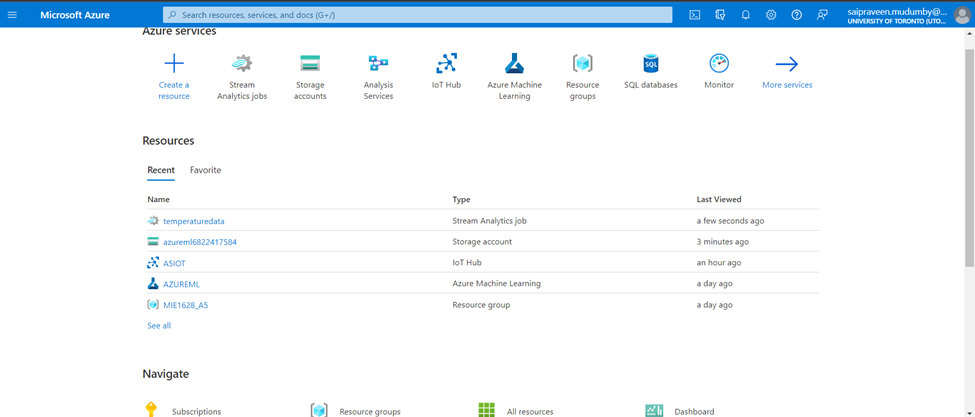

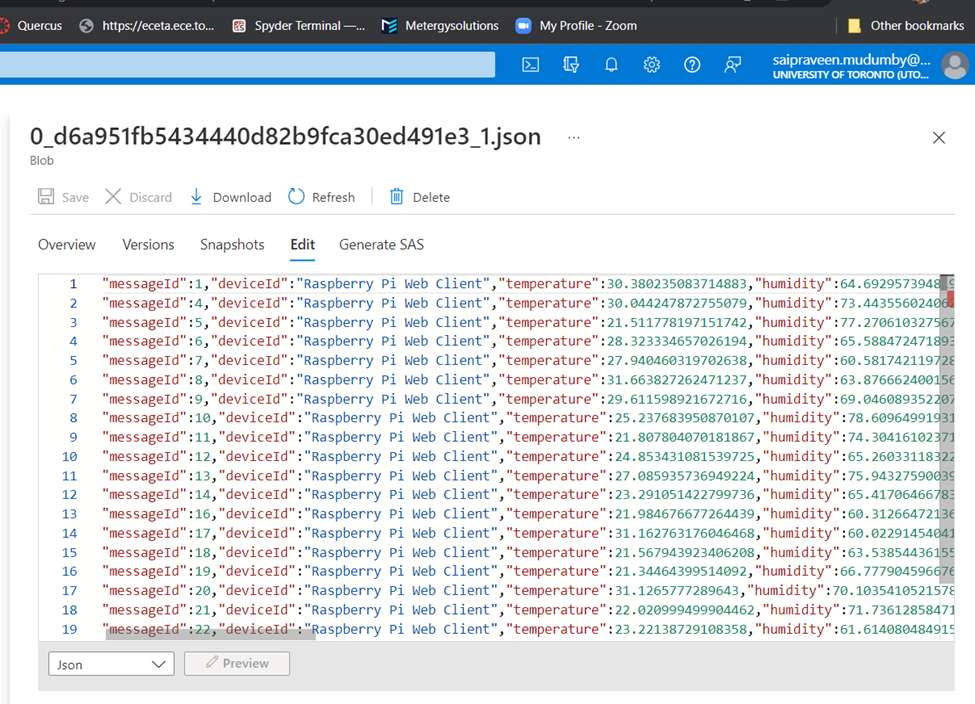

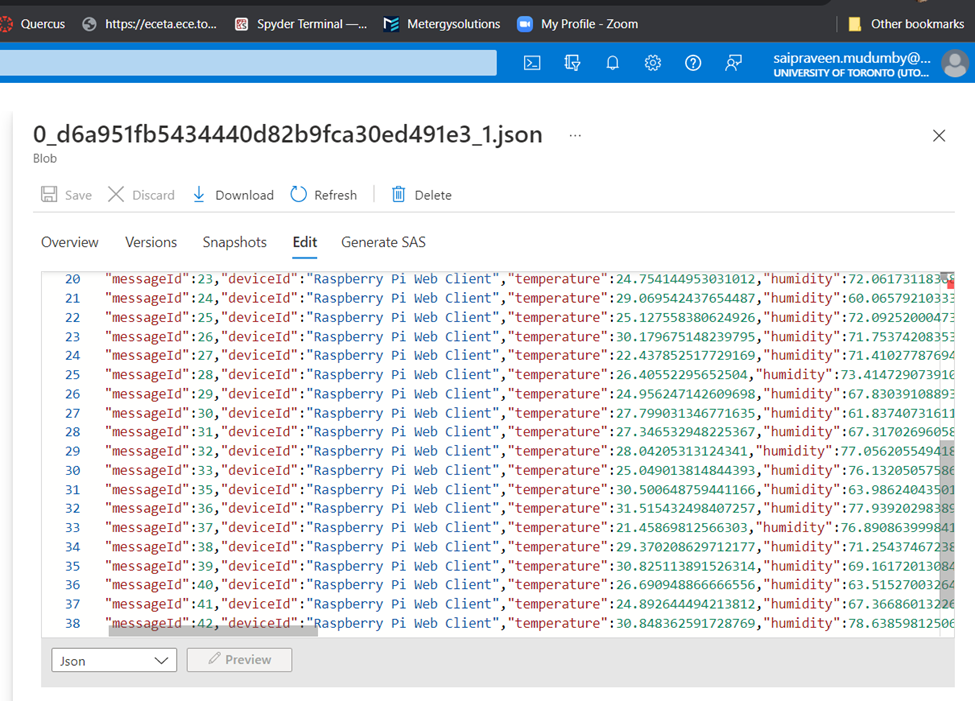

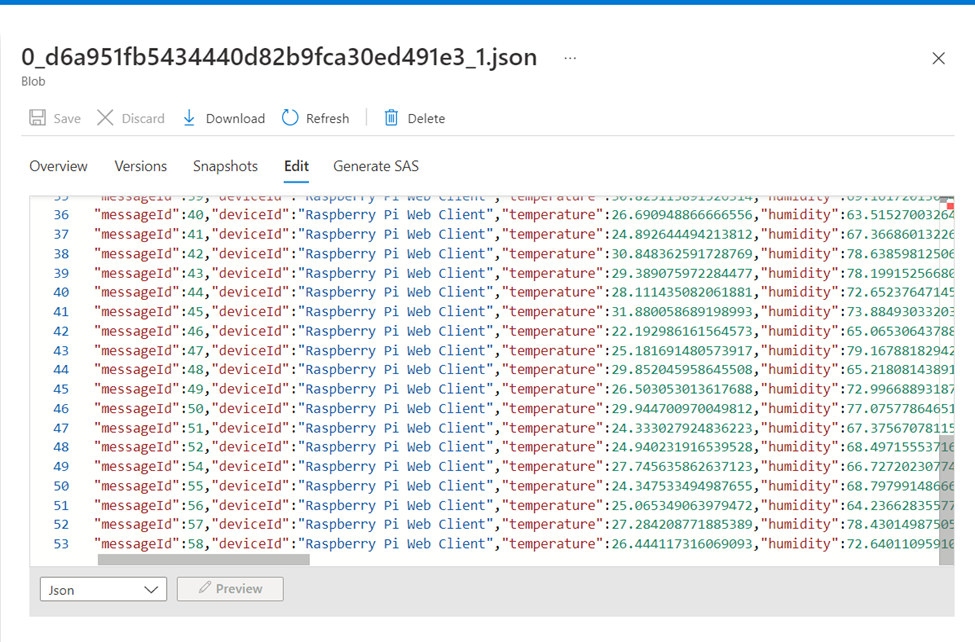

**PART B**

# Q1 Problem Statement

Dataset Link - https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

Dataset Description -The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction.The data was obtained by crawling online pharmaceutical review sites. 

Attribute Information - 
1. drugName (categorical): name of drug
2. condition (categorical): name of condition
3. review (text): patient review
4. rating (numerical): 10 star patient rating
5. date (date): date of review entry
6. usefulCount (numerical): number of users who found review useful

Problem Statement 

1. To perform EDA, understand general trends on drug usage, conditons suffered by patients etc. 

2. Sentiment Analysis on the reviews

3. Predict the rating of drug based on the reviews provided. 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


In [2]:
df_test=pd.read_csv('drugsComTest_raw.tsv', sep='\t')
df_train=pd.read_csv('drugsComTrain_raw.tsv', sep='\t')


In [3]:
df_train.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [4]:
df_test.head()

Unnamed: 0         drugName                     condition  \
0      163740      Mirtazapine                    Depression   
1      206473       Mesalamine  Crohn's Disease, Maintenance   
2      159672          Bactrim       Urinary Tract Infection   
3       39293         Contrave                   Weight Loss   
4       97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating  \
0  "I&#039;ve tried a few antidepressants over th...    10.0   
1  "My son has Crohn&#039;s disease and has done ...     8.0   
2                      "Quick reduction of symptoms"     9.0   
3  "Contrave combines drugs that were used for al...     9.0   
4  "I have been on this birth control for one cyc...     9.0   

                 date  usefulCount  
0   February 28, 2012           22  
1        May 17, 2009           17  
2  September 29, 2017            3  
3       March 5, 2017           35  
4    October 22, 2015            4

In [5]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [6]:
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   53766 non-null  int64  
 1   drugName     53766 non-null  object 
 2   condition    53471 non-null  object 
 3   review       53766 non-null  object 
 4   rating       53766 non-null  float64
 5   date         53766 non-null  object 
 6   usefulCount  53766 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


We already see there are some null values present in the column condition. Let us see how many of them are there and what is % ratio of it for both the test and train data. 



In [7]:
df_test.describe()

Unnamed: 0        rating   usefulCount
count   53766.000000  53766.000000  53766.000000
mean   116386.701187      6.976900     27.989752
std     67017.739881      3.285207     36.172833
min         0.000000      1.000000      0.000000
25%     58272.500000      4.000000      6.000000
50%    116248.500000      8.000000     16.000000
75%    174586.750000     10.000000     36.000000
max    232284.000000     10.000000    949.000000

In [8]:
df_train.describe()

Unnamed: 0         rating    usefulCount
count  161297.000000  161297.000000  161297.000000
mean   115923.585305       6.994377      28.004755
std     67004.445170       3.272329      36.403742
min         2.000000       1.000000       0.000000
25%     58063.000000       5.000000       6.000000
50%    115744.000000       8.000000      16.000000
75%    173776.000000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

In [9]:
df_train.isnull().any()

Unnamed: 0     False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [10]:
df_test.isnull().any()

Unnamed: 0     False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [11]:
df_train['condition'].isnull().sum()

899

In [12]:
df_test['condition'].isnull().sum()

295

In [13]:
652/114513

0.005693676700461957

In [14]:
295/53766

0.0054867388312316336

Both the dataset contain about 0.5% of null values. Hence a total summation of close to 1%. We can do the following things : 

1. Drop the null values

2. Try to fill in the empty values using histroical data present in dataset and performing a mapping. However this might be not be useful as there could be more than one drug treating multiple conditions and choosing any drug at random or the most common one could introduce bias. However our main goal to predict the rating based on reviews received. Had it been the other away around e.g predict the conditions based on the reviews it would have been different story. 

 Before preprocessing let us perform some EDA by combining both the datasets to visualize the data. 

In [15]:
data=pd.concat([df_train,df_test])

In [16]:
data.shape


(215063, 7)

## Why merge and pristine data ? 

1. The dataset came with data already split ?!  I could not find any reason why they have split the dataset without pre-processing even though both have null value and textual data often requires some cleaning to remove stopwords etc to better peform on sentimental analysis and on tf-idf algorithms. 

2. While it is the best practice to keep a test set always pristine where no one has looked into it. I am afraid that if I clean my train data properly and the do not clean the test data equally good. Whatever model I perform might be not be upto the mark. Hence I decided to merge the data and clean it in one go. Mergining in this case also helps me to analyse the all the data records in one go also. 

# **Q2. EDA**

In [17]:
data_con=data['condition'].value_counts()

In [18]:
data_con.shape

(916,)

# **Chart 1 : Top and bottom 20 conditions present in the dataset.**

Since it is not possible to plot all 916 features we will plot the first and last 20 features to get some idea. 

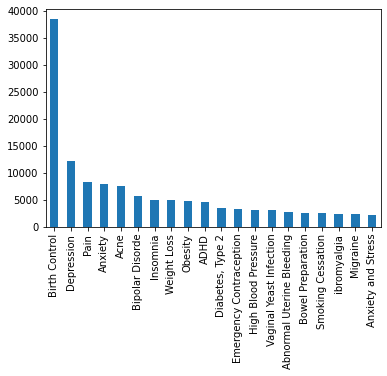

In [19]:
data_con[0:20].plot.bar(rot=90)

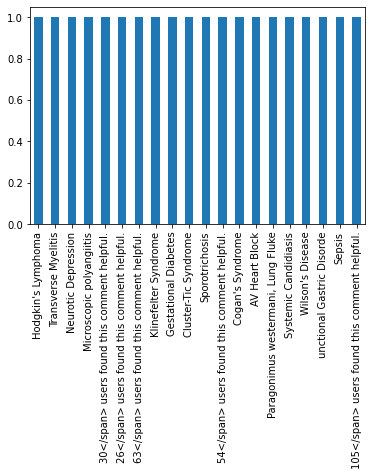

In [20]:
data_con[-20:].plot.bar(rot=90)

# **Comments on Chart 1 : Top & Bottom 20 Conditions**


*   Birth Control tops the chart with close to 38,000 users followed by depression (12,000).
*   Depression, Pain, Acne, Anxiety, Insomnia are other top common conditions faced by people. These are quite common conditions which we keep hearing every now and then. One point to note here is Pain is a very broad category.
* Assumption : The general public ( non-medical) would have heard and recongized about 10 of these conditions easily. Even though this dataset was released in the year 2018.
*  Straight away we see some noise in data starting with </span> users found this comment helpful. We have to remove this. 
*   Assumption : Most of general public would not have heard most of the conditions 
*   A casual google search "like number of people of suffering from Hodgkin's Lymphobia" (similary Wilson disease, what is Cogan's syndrome etc) revelaed most of there are extremely rare conditions. 






In [21]:
### Chart 2 - Distrubution of Ratings

data_ratings=data['rating'].value_counts()

In [22]:
data_ratings

10.0    68005
9.0     36708
1.0     28918
8.0     25046
7.0     12547
5.0     10723
2.0      9265
3.0      8718
6.0      8462
4.0      6671
Name: rating, dtype: int64

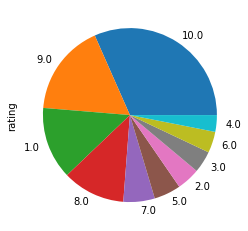

In [23]:
data_ratings.plot.pie()

**#Comments on Chart 2 : Distribution of ratings**


*   Drugs with rating 10 tops the chart followed by rating 9 and rating 1. 
*   If we are to consider a rating > 5 to be positive rating and < 5 to be can already see that the dataset has more positive reviews. We will explore the imbalance in dataset at a later stage.



In [24]:
### Chart 3 Top 20 drugs with rating 10/10 and Top 20 drugs with rating 1/10

top_drugs=data.loc[data.rating==10,"drugName"].value_counts()

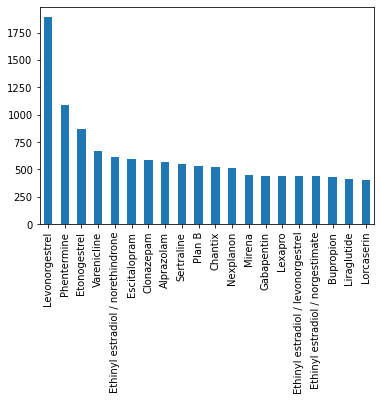

In [25]:
top_drugs[:20].plot.bar(rot=90)

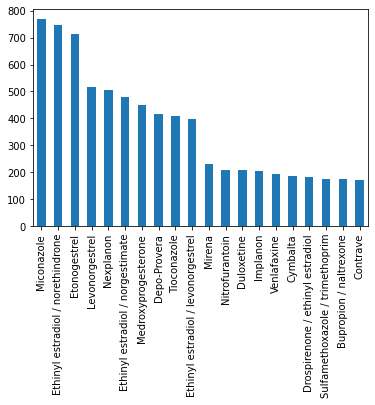

In [26]:
bottom_drugs=data.loc[data.rating==1,"drugName"].value_counts()
bottom_drugs[:20].plot.bar(rot=90)

#**Comments on Chart 3 : Top & Bottom drugs with 10/10 rating and 1/10 rating**



*   Levonorgestrel which tops the rating chart is used for birth control which tops the conditions. It can be infered that most likely levonorgestrel was chosen as best drug for people taking medication for birth control however this drug makes a appreance in the drugs rated 1.0 with 
*   Phentermine which seconds the list is used for weight loss and obesity. 
*   Most of the drugs used are alternate options for birth control, weight loss etc. 
*  Miconzole which tops with rating of 1.0 is used for vaginal yeast infection.
*   Some other conditons which make appreance are birth control, weight loss etc.
*   Quite naturally what works for some do not esentially work for another. Some alternatives work good some do not. Medical drugs are extremely complicated and their reaction in treatement is different since lot of factors influence the treatement. 







In [27]:
### Plot 4 on time-series data

pd_dt=pd.to_datetime(data['date'])

In [28]:
pd_dt

0       2012-05-20
1       2010-04-27
2       2009-12-14
3       2015-11-03
4       2016-11-27
           ...    
53761   2014-09-13
53762   2016-10-08
53763   2010-11-15
53764   2011-11-28
53765   2009-09-13
Name: date, Length: 215063, dtype: datetime64[ns]

In [29]:
pd_dt_counts=pd_dt.value_counts()

In [30]:
pd_dt_counts

2016-03-01    185
2016-03-31    183
2017-01-18    182
2015-12-15    181
2016-03-02    181
             ... 
2008-05-18      5
2017-12-07      5
2008-02-24      5
2008-05-17      4
2008-12-20      4
Name: date, Length: 3579, dtype: int64

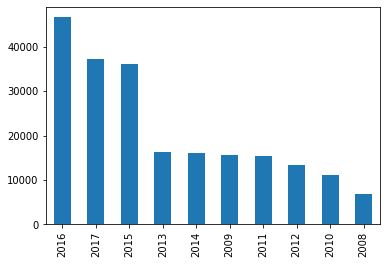

In [31]:
#year plot 
yr=pd_dt.dt.year
yr.value_counts().plot.bar(rot=90)

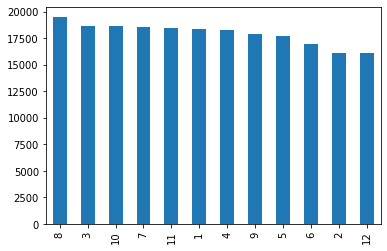

In [32]:
#month plot
mt=pd_dt.dt.month
mt.value_counts().plot.bar(rot=90)

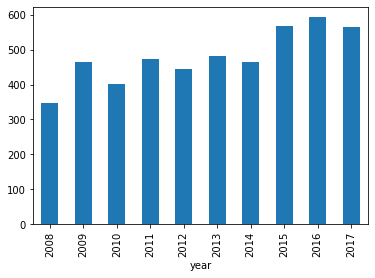

In [33]:
data['year']=yr
data.groupby('year')['condition'].nunique().plot.bar(rot=90)




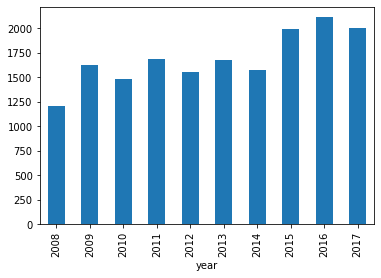

In [34]:
data.groupby('year')['drugName'].nunique().plot.bar(rot=90)

#**Comments on Plot 4 : Time series data**


*   2008 has the least number of reviews and over the period the number of reviews increased and recorded the maximum at the year 2016. 

*   Since this dataset was generated by crawling online pharma websites, one can understand that 2008 was the early stages of internet boom. 

*   In the month wise distribution decemeber has the least reviews, where Aug records the maximum records. All other months has equal distributions.

*   Number of conditions were periodically increasing and decreasing till 2014, after which there was a  rise till 2017. Does the number of conditions increase lead to rise in drugs also ? 

*   Yes, the number of unquie drugs names  over the years follows the exact same pattern as that of conditions 









# **Plot 5 Number of Drugs per condition**

In [37]:
data.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(50)

condition
Not Listed / Othe                             253
Pain                                          219
Birth Control                                 181
High Blood Pressure                           146
Acne                                          127
Depression                                    115
Rheumatoid Arthritis                          107
Diabetes, Type 2                               97
Allergic Rhinitis                              95
Insomnia                                       85
Osteoarthritis                                 84
Bipolar Disorde                                82
Anxiety                                        81
Abnormal Uterine Bleeding                      77
Endometriosis                                  64
3</span> users found this comment helpful.     62
Psoriasis                                      61
Migraine                                       60
ADHD                                           58
4</span> users found this comment helpfu

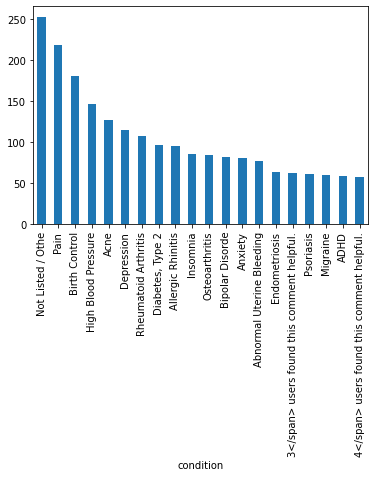

In [38]:
data.groupby('condition')['drugName'].nunique().sort_values(ascending=False)[0:20].plot.bar(rot=90)

# **Comments on Chart 5**



*   We see that pain and birth control have the hightest amount of unique drungs among the conditions.
*   Again we notice lot of noise in the dataset which needs to be cleaned. 



# **Q3 [Marks: 15] Do data cleaning/pre-processing as required and explain what you have done for your dataset and why?**

In [39]:
pd.set_option('display.max_colwidth', None)

Removing Null values first 

In [40]:
data.isnull().any()

Unnamed: 0     False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
year           False
dtype: bool

In [41]:
data.shape

(215063, 8)

In [42]:
# Dropping the data points with null values as it's very much less than 1% of the whole dataset
data = data.dropna(how = 'any', axis = 0)

print ("The shape of the dataset after null values removal :", data.shape)

The shape of the dataset after null values removal : (213869, 8)


Removing the rows with "span" data.

In [43]:

span_data = data[data['condition'].str.contains('</span>',case=False,regex=True) == True]
print('Number of rows with </span> values : ', len(span_data))
noisy_data_ = 100 * (len(span_data)/data.shape[0])
print('Total percent of noisy data {} %  '.format(noisy_data_))


Number of rows with </span> values :  1171
Total percent of noisy data 0.5475314327929715 %  


In [44]:
data.drop(span_data.index, axis = 0, inplace=True)


In [45]:
data.shape

(212126, 8)

Removing the 'not listed/other conditions'

In [46]:
#check the percentage of 'not listed / othe' conditions
not_listed = data[data['condition'].str.contains('Not Listed / Othe', case=False, regex=True)==True]
print('Number of not_listed values : ', len(not_listed))
percent_not_listed = 100 * len(not_listed)/data.shape[0]
print('Total percent of noisy data {} %  '.format(percent_not_listed))


Number of not_listed values :  590
Total percent of noisy data 0.27813657920292656 %  


In [47]:
#check the percentage of 'not listed / othe' conditions
not_listed = data[data['condition']=='Not Listed / Othe']
print('Number of not_listed values : ', len(not_listed))
percent_not_listed = 100 * len(not_listed)/data.shape[0]
print('Total percent of noisy data {} %  '.format(percent_not_listed))


Number of not_listed values :  590
Total percent of noisy data 0.27813657920292656 %  


In [48]:
data.drop(not_listed.index, axis = 0, inplace=True)


In [49]:
data.shape

(211247, 8)

In [50]:
#quickly checking once again if there are any changes.
data.groupby('condition')['drugName'].nunique().sort_values(ascending=False).head(100)

condition
Pain                   219
Birth Control          181
High Blood Pressure    146
Acne                   127
Depression             114
                      ... 
Ovarian Cysts           22
Weight Loss             22
Gout, Acute             21
Stomach Ulce            21
Psoriatic Arthritis     21
Name: drugName, Length: 100, dtype: int64

In [51]:
print("Total loss in data is ", (215063-211247)/215063)

Total loss in data is  0.017743637910751734


 ** Textual Data Cleaning**

Steps for reviews pre-processing.
- Remove HTML tags
    - Using BeautifulSoup from bs4 module to remove the html tags. We have already removed the html tags with pattern "64</span>...", we will use get_text() to remove the html tags if there are any.
- Remove Stop Words
    - Remove the stopwords like "a", "the", "I" etc.
- Remove symbols and special characters
    - We will remove the special characters from our reviews like '#' ,'&' ,'@' etc.
- Tokenize
    - We will tokenize the words. We will split the sentences with spaces e.g "I might come" --> "I", "might", "come"
-  Stemming
    - Remove the suffixes from the words to get the root form of the word e.g 'Wording' --> "Word"

In [52]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
data

Unnamed: 0                  drugName                     condition  \
0          206461                 Valsartan  Left Ventricular Dysfunction   
1           95260                Guanfacine                          ADHD   
2           92703                    Lybrel                 Birth Control   
3          138000                Ortho Evra                 Birth Control   
4           35696  Buprenorphine / naloxone             Opiate Dependence   
...           ...                       ...                           ...   
53761      159999                 Tamoxifen     Breast Cancer, Prevention   
53762      140714              Escitalopram                       Anxiety   
53763      130945            Levonorgestrel                 Birth Control   
53764       47656                Tapentadol                          Pain   
53765      113712                 Arthrotec                      Sciatica   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1                                           "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."   
2                             "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have a

In [54]:
#import the libraries for pre-processing
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stops = set(stopwords.words('english')) #english stopwords

stemmer = SnowballStemmer('english') #SnowballStemmer

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Remove all other letters apart from ASCII English letter ( basically remove all digits, puncuations etc.)
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [55]:
data['review_clean']=data['review'].apply(review_to_words)

In [56]:
data.head(10)

Unnamed: 0                            drugName  \
0      206461                           Valsartan   
1       95260                          Guanfacine   
2       92703                              Lybrel   
3      138000                          Ortho Evra   
4       35696            Buprenorphine / naloxone   
5      155963                              Cialis   
6      165907                      Levonorgestrel   
7      102654                        Aripiprazole   
8       74811                              Keppra   
9       48928  Ethinyl estradiol / levonorgestrel   

                      condition  \
0  Left Ventricular Dysfunction   
1                          ADHD   
2                 Birth Control   
3                 Birth Control   
4             Opiate Dependence   
5  Benign Prostatic Hyperplasia   
6       Emergency Contraception   
7               Bipolar Disorde   
8                      Epilepsy   
9                 Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1                "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so

**Comments after cleaning the Textual data**


*   Comparing review_clean and review gives the overall pictures on what has happened
*   Cleaning textual data for sentiment analysis and vecotorization is quite important as we want only the higher order important words which are unqiue and help us in our classficiation task. 



# **Perform Sentiment Analysis**

In [58]:
from textblob import TextBlob

In [59]:
sentiment_polarity=[]
for review in data['review_clean']:
  blob=TextBlob(review)
  sentiment_polarity+=[blob.sentiment.polarity]


In [60]:
data['sentiment_polarity']=sentiment_polarity


In [61]:
textblob_dist=pd.DataFrame({'values':[np.sum(data['sentiment_polarity']>0),np.sum(data['sentiment_polarity']<0),np.sum(data['sentiment_polarity']==0)]},index=['positive','negative','neutral'])


          values
positive  133186
negative   56786
neutral    21275


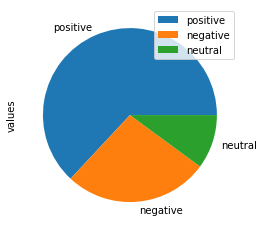

In [62]:
textblob_dist.plot.pie(y='values')
print(textblob_dist)

In [63]:
data.head(10)

Unnamed: 0                            drugName  \
0      206461                           Valsartan   
1       95260                          Guanfacine   
2       92703                              Lybrel   
3      138000                          Ortho Evra   
4       35696            Buprenorphine / naloxone   
5      155963                              Cialis   
6      165907                      Levonorgestrel   
7      102654                        Aripiprazole   
8       74811                              Keppra   
9       48928  Ethinyl estradiol / levonorgestrel   

                      condition  \
0  Left Ventricular Dysfunction   
1                          ADHD   
2                 Birth Control   
3                 Birth Control   
4             Opiate Dependence   
5  Benign Prostatic Hyperplasia   
6       Emergency Contraception   
7               Bipolar Disorde   
8                      Epilepsy   
9                 Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1                "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so

# Compare the results with Vader 

In [64]:
pip install vadersentiment 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 27.9 MB/s 


In [65]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
v_intensity=SentimentIntensityAnalyzer()
v_scores=[]
for review in data['review_clean']:
  compound_value=v_intensity.polarity_scores(review)
  v_scores.append(compound_value['compound'])
data['vader_intensity']=v_scores

data.head(10)



Unnamed: 0                            drugName  \
0      206461                           Valsartan   
1       95260                          Guanfacine   
2       92703                              Lybrel   
3      138000                          Ortho Evra   
4       35696            Buprenorphine / naloxone   
5      155963                              Cialis   
6      165907                      Levonorgestrel   
7      102654                        Aripiprazole   
8       74811                              Keppra   
9       48928  Ethinyl estradiol / levonorgestrel   

                      condition  \
0  Left Ventricular Dysfunction   
1                          ADHD   
2                 Birth Control   
3                 Birth Control   
4             Opiate Dependence   
5  Benign Prostatic Hyperplasia   
6       Emergency Contraception   
7               Bipolar Disorde   
8                      Epilepsy   
9                 Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1                "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so

          values
positive  111558
negative   89143
neutral    10546


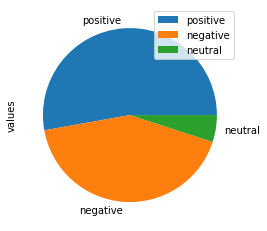

In [66]:
sent_dist=pd.DataFrame({'values':[np.sum(data['vader_intensity']>0),np.sum(data['vader_intensity']<0),np.sum(data['vader_intensity']==0)]},index=['positive','negative','neutral'])
sent_dist.plot.pie(y='values')
print(sent_dist)

Vander Sentimenet Analysis classifies more negative comments than textblob and in general practice it has been found that Vader handles negative polaity much better than TextBlob. Let us further analyse how they work with some general medical reviews

In [67]:
print(v_intensity.polarity_scores("Taking this medicine had side effects such as headache"))
print(TextBlob("Taking this medicine had side effects such as headache").sentiment.polarity)


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0


This is complex interpretation from a human prespective also

1. In reality the medicine might have some side effects irrepsective of person, age etc. So this behaviour is expected. 

2. Having side effects of a medicine usually treated in a negative way as the patient is informed beforehand of these effects and people do not desire side effects of a medication. 

Overall in my opinion side effects of medicine should be treated in negative way. However both give out neutral results. 

In [68]:
print(v_intensity.polarity_scores("Taking this medicine cured my illness"))
print(TextBlob("Taking this medicine cured my illness").sentiment.polarity)

{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'compound': -0.4019}
0.0


This is where the true problem arises, "cured my illness" is something positive. However more importance is given to illness word assigning a negative score. 

TextBlob perform somewhat better however the score is still not good. 

In [69]:
print(v_intensity.polarity_scores("I have Diarrhea and taking this medicine had no effect"))
print(TextBlob("I have Diarrhea and taking this medicine had no effect").sentiment.polarity)

{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.296}
0.0


A neutral sentence where TextBlob performed better. 

In [70]:
print(v_intensity.polarity_scores("I have Diarrhea and taking this medicine made it more worse"))
print(TextBlob("I have Diarrhea and taking this medicine made it more worse").sentiment.polarity)

{'neg': 0.253, 'neu': 0.747, 'pos': 0.0, 'compound': -0.5256}
0.04999999999999999


A negative review where Vader perfomed better. 

In [71]:
print(v_intensity.polarity_scores("After taking Levonorgestrel, I had migraine and vomitigs"))
print(TextBlob("After taking Levonorgestrel, I had migraine and vomitigs").sentiment.polarity)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
0.0


Not a reliable results let us modify this sentence slightly and see what do we get.

In [72]:
print(v_intensity.polarity_scores("After taking Levonorgestrel, I had migraine and vomitigs hence I would not recommend it to anyone suffering from cough"))
print(TextBlob("After taking Levonorgestrel,I had migraine and vomitigs hence I would not recommend it to anyone suffering from cough").sentiment.polarity)

{'neg': 0.235, 'neu': 0.765, 'pos': 0.0, 'compound': -0.6381}
0.0


Vader outperforms and assigns correctly. 

In [73]:
text="""Suboxone has completely turned my life around. I feel healthier, I'm excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you're ready to stop, there's a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I'm actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin."""

In [74]:
print(v_intensity.polarity_scores(text))
print(TextBlob(text).sentiment.polarity)

{'neg': 0.061, 'neu': 0.771, 'pos': 0.168, 'compound': 0.9403}
0.19444444444444445


Vader for the win in the above example. This example is taken from the review without doing pre-processing. While the pre-processing score is 0.89

**Comments on Sentiment Analysis**

Naturally it was expected that those with rating >7 or 8 would have strongly positive reviews, those with rating 4-5 would be netural and < 4 would be strongly negative. 

Some things to note here are :                           

1. We are dealing with medical textual data and in these scenarios vader & textblob both might lack some predefined rules for medical terms. For example some medical conditions such as acne, rashes, shaking of arms and legs ,drug names,  weight gain might not be included well within the libraries. While a general human reading the reviews might understand the sentiment it will be really hard to depend on the results based generic words only. 

2. TextBlob and Vader work with general purpose twitter and movie reviews data.
2. We have cleaned to the sentences to reduced the words as sentiment analysis works will less words also.

**Final Conclusion on Sentiment Analysis**

1. Vader peforms better than TextBlob overall. 
2. However both are highly unreliable and as such we will not be using the sentiment scores to create our target variable. We will use the actual ratings as such to create the target column.
2. A customer analyzer which includes some medical terms,medical conditions,things such as side effects etc. should be included for best results. 







**Creating our Target Column**


We are going to use the threshold rating of 5 for giving the class, The review will have a positive sentiment (1) if rating > 5 and negative sentiment otherwise.

In [75]:
data['rating_label'] = data['rating'].apply(lambda x: 1 if x > 5 else 0)
data.head(10)

Unnamed: 0                            drugName  \
0      206461                           Valsartan   
1       95260                          Guanfacine   
2       92703                              Lybrel   
3      138000                          Ortho Evra   
4       35696            Buprenorphine / naloxone   
5      155963                              Cialis   
6      165907                      Levonorgestrel   
7      102654                        Aripiprazole   
8       74811                              Keppra   
9       48928  Ethinyl estradiol / levonorgestrel   

                      condition  \
0  Left Ventricular Dysfunction   
1                          ADHD   
2                 Birth Control   
3                 Birth Control   
4             Opiate Dependence   
5  Benign Prostatic Hyperplasia   
6       Emergency Contraception   
7               Bipolar Disorde   
8                      Epilepsy   
9                 Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1                "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so

# Checking on class imbalance

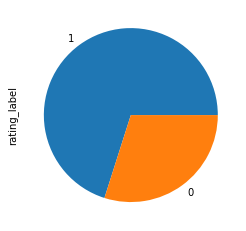

In [76]:
data['rating_label'].value_counts().plot.pie()

In [77]:
data['rating_label'].value_counts()

1    148071
0     63176
Name: rating_label, dtype: int64

In [78]:
print("% of class 1 labels are ",148071/data.shape[0])
print("% of class 0 labels are",63176/data.shape[0])

% of class 1 labels are  0.7009377647966598
% of class 0 labels are 0.2990622352033402


We find that the dataset is highly imbalanced with 70:30 ratio. Even though we can run ML models on these and get somewhat desirable results , it still should be treated as a class imbalance problem and we process further to downsample the majority class.

**Downsampling the dataset to make equal distribution**

In [79]:
class_1=data[data['rating_label']==1]
class_0=data[data['rating_label']==0]
print(class_1.shape)
print(class_0.shape)

(148071, 12)
(63176, 12)


In [80]:
from sklearn.utils import resample
class_1_downsample=resample(class_1,replace=True,n_samples=class_0.shape[0],random_state=42)
print(class_1_downsample.shape)

(63176, 12)


In [81]:
class_1_downsample

Unnamed: 0                  drugName           condition  \
15590       106834                  Implanon       Birth Control   
52010        65311                    Yasmin                Acne   
30180        56588                    Elavil  Anxiety and Stress   
150187      225640                 Bupropion   Smoking Cessation   
12568        50313                Gabapentin             Anxiety   
...            ...                       ...                 ...   
112174       65828               Propranolol             Anxiety   
55383        14473  Buprenorphine / naloxone   Opiate Dependence   
24399       183640                  Cymbalta             Anxiety   
95549        93643                  Morphine        Chronic Pain   
30130       112665                   Lunesta            Insomnia   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       review  \
15590                                          "I&#039;ve been on Implanon since April 2013...for the entire first year I had absolutely no period which was great! About 2 months ago I got a very heavy period. I&#039;ve been having light bleeding ever since and it&#039;s driving me nuts, but overall this is the best method of birth control for me. And I&#039;ve tried everything! Side effects are different for everyone and it can always be taken out if it doesn&#039;t work for you. I&#039;d say if you&#039;re forgetful or just prefer a form of birth control that requires no effort don&#039;t hesitate to give this a try I love it!"   
52010                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         "It took six months to my skin to get clear. The first 4 months were the worst, but now, I don"   
30180                                                                                                                                                                                                                                                                                                    "This medication has been very effective for my anxiety. I&#039;ve taken 75mg for the past 9yrs. No more heart palpitations or tightness in my chest. I have tried others prior to the Elavil, but found I woke up with a hangover and a out of body feeling. If Ii forget to order refill before I run out it takes a 3 days to feel the effects. "   
150187                                                                                                                                                                                                                                                                                                                                                                                                                                     "After 25 years of heavy smoking I quit in five days! (Though I enjoyed smoking so much!) This happened 13 years ago. Since then - no cravings. My husband followed my example: the same result seven da

(126352, 12)
1    63176
0    63176
Name: rating_label, dtype: int64


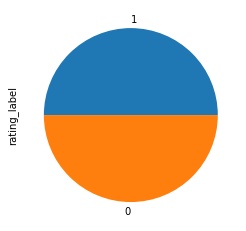

In [82]:
data_downsampled=pd.concat([class_1_downsample,class_0])
print(data_downsampled.shape)
print(data_downsampled['rating_label'].value_counts())
data_downsampled['rating_label'].value_counts().plot.pie()


# **Comments on class imbalance**

We have downsampled the majority class to have a equal distribution of data (50:50). We will evaluate the performances of both the datasets ( balanced and unbalanced) in Q4 and check the results.




# **Summary of Data Pre-processing done in Q3.**

1. We cleaned the textual data to get rid of unnecessary common words, remove punctuations etc. 

2. We performed Sentiment Analysis to understand the nature of reviews and the distribution of the reviews

3. Created our target variable based on threshold of 0.5 for a binary classification. 

4. Checked on the dataset imbalance and found that we had ratio of imbalance of 70:30 ( class 1 : class 0) 

5. Downsampled dataset to bring to 50:50 dataset to remove class imbalance. 

We now have 2 datasets, let us now move to Q4 and build the models. 

# **Q4 Implement 2 machine learning models, explain which algorithms you have selected and why. Compare them and show success metrics (Accuracy/RMSE/Confusion Matrix) as per your problem. Explain results.**

We will primarily use two algos: 

1. Random Forest - This algo hands down works best with many of the classification problems seen in practice. A ensemble classifier based on number of decisions trees. 

2. Naive Bayes- i) quite fast, ii) known to work well with textual data. Though it requires integer features, in pratice can work will tf-idf also. 


We can run another supervised classification problems like KNN, SVM , Logisitic Regression, SVC etc . KNN is ofcourse out of bounds for such a large dataset with so many features. 

Since we cannot feed raw textual data we will use tf-idf vectorizer to convert our textual data to vectorized format. 

In [83]:
from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer 
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
from sklearn.ensemble import RandomForestClassifier  #import RandomForestClassifier

In [84]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
reviews_corpus = vectorizer.fit_transform(data.review_clean)
reviews_corpus.shape


(211247, 34579)

In [85]:
#checking how our sparse matrix looks like 
reviews_corpus[0:100].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
#not of relevance but just to check that all elements are not zero
np.max(reviews_corpus[0:100].toarray())

0.7641746820118535

In [87]:
sentiment_data=data['rating_label']
sentiment_data.shape

(211247,)

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,sentiment_data,test_size=0.30)
print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)


Train data shape  (147872, 34579) (147872,)
Test data shape  (63375, 34579) (63375,)


MNB Model

In [89]:
clf = MultinomialNB().fit(X_train, Y_train) #fit the training data

pred = clf.predict(X_test) #predict the sentiment for test data

print("Accuracy: %s" % str(clf.score(X_test, Y_test))) #check accuracy
print("Confusion Matrix") 
print(confusion_matrix(Y_test,pred)) #print confusion matrix

Accuracy: 0.7573491124260355
Confusion Matrix
[[ 4259 14794]
 [  584 43738]]


Random Forest Classifier

In [90]:

#fit the model and predicct the output

clf = RandomForestClassifier().fit(X_train, Y_train)

pred = clf.predict(X_test)

print("Accuracy: %s" % str(clf.score(X_test, Y_test)))
print("Confusion Matrix")
print(confusion_matrix(Y_test, pred))


Accuracy: 0.8999605522682446
Confusion Matrix
[[13137  5916]
 [  424 43898]]


In [91]:
from sklearn.metrics import * 
print('f1 score is',f1_score(Y_test,pred))
print('recall score is',recall_score(Y_test,pred))
print('precision score is',precision_score(Y_test,pred))

f1 score is 0.9326506331265403
recall score is 0.990433644691124
precision score is 0.8812382061267917


**Results with using downsampled dataset**

In [92]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer_downsampled = TfidfVectorizer()
reviews_corpus_downsampled = vectorizer.fit_transform(data_downsampled.review_clean)
reviews_corpus_downsampled.shape

(126352, 27626)

In [93]:
sentiment_data_downsampled=data_downsampled['rating_label']
sentiment_data_downsampled.shape

(126352,)

In [94]:
X_train_down,X_test_down,Y_train_down,Y_test_down = train_test_split(reviews_corpus_downsampled,sentiment_data_downsampled,test_size=0.30)
print('Train data shape ',X_train_down.shape,Y_train_down.shape)
print('Test data shape ',X_test_down.shape,Y_test_down.shape)

Train data shape  (88446, 27626) (88446,)
Test data shape  (37906, 27626) (37906,)


In [95]:
clf_down = MultinomialNB().fit(X_train_down, Y_train_down) #fit the training data

pred_down = clf_down.predict(X_test_down) #predict the sentiment for test data

print("Accuracy: %s" % str(clf_down.score(X_test_down, Y_test_down))) #check accuracy
print("Confusion Matrix") 
print(confusion_matrix(Y_test_down, pred_down)) #print confusion matrix

Accuracy: 0.7732285126365219
Confusion Matrix
[[14772  4218]
 [ 4378 14538]]


In [96]:

#fit the model and predict the output

clf_rf_down = RandomForestClassifier().fit(X_train_down, Y_train_down)

pred_rf_down = clf_rf_down.predict(X_test_down)

print("Accuracy: %s" % str(clf_rf_down.score(X_test_down, Y_test_down)))
print("Confusion Matrix")
print(confusion_matrix(Y_test_down,pred_rf_down,))


Accuracy: 0.8851105365905134
Confusion Matrix
[[16999  1991]
 [ 2364 16552]]


In [97]:
print('f1 score is',f1_score(Y_test_down,pred_rf_down))
print('recall score is',recall_score(Y_test_down,pred_rf_down))
print('precision score is',precision_score(Y_test_down,pred_rf_down))


f1 score is 0.88373955524707
recall score is 0.8750264326496088
precision score is 0.8926279458555789


# Conclusion on ML Models & Dataset


*   Random Forest outperforms MNB with both dataset
* MNB on balanced dataset performs much better than unbalanced dataset.
*   Random Forest on the unbalanced dataset has higher scores in all areas expect precision for the balanced dataset.  


We necessarily do not improve our model performace even if we have balanced the dataset. One obvious thing is that when we downsampled we have lost some import data our review_corpus changed shaped from 36k to 27k after doing tf-idf. 

Our objective : Predict rating based on the review data. 

If we were to solely choose based on f1-score then RandomForest trained on unbalanced works better than the balanced set. Had it been to predict condition based on review data we would have worked more towards having a higher recall (in my opinion). However we will stick with a balanced data for AutoML also. 



# Download the dataset to feed into AutoML 

In [98]:
data={'clean_review':data_downsampled['review_clean'],'target':data_downsampled['rating_label']}
data_clean=pd.DataFrame(data=data)


In [99]:
data_clean.head()

clean_review  \
15590   implanon sinc april entir first year absolut period great month ago got heavi period light bleed ever sinc drive nut overal best method birth control tri everyth side effect differ everyon alway taken work say forget prefer form birth control requir effort hesit give tri love   
52010                                                                                                                                                                                                                                        took six month skin get clear first month worst   
30180                                                                                                                      medic effect anxieti taken mg past yrs heart palpit tight chest tri other prior elavil found woke hangov bodi feel ii forget order refil run take day feel effect   
150187                                                                                                                                                        year heavi smoke quit five day though enjoy smoke much happen year ago sinc crave husband follow exampl result seven day later   
12568                                                       exhaust histori anxieti led self medic alcohol final find correct medic doctor doctor past write scrip make crazier crazier ad problem alcohol free panic attack problem keep occupi work fun thing sleep like babi night wonder   

        target  
15590        1  
52010        1  
30180        1  
150187       1  
12568        1

In [100]:
data_clean.shape

(126352, 2)

In [101]:
data_clean.to_csv('uci_data_review_clean.csv')

**Q5. Use Automated ML for your data set. Explain best model results.**

1. Screenshot of Completed Job Run 

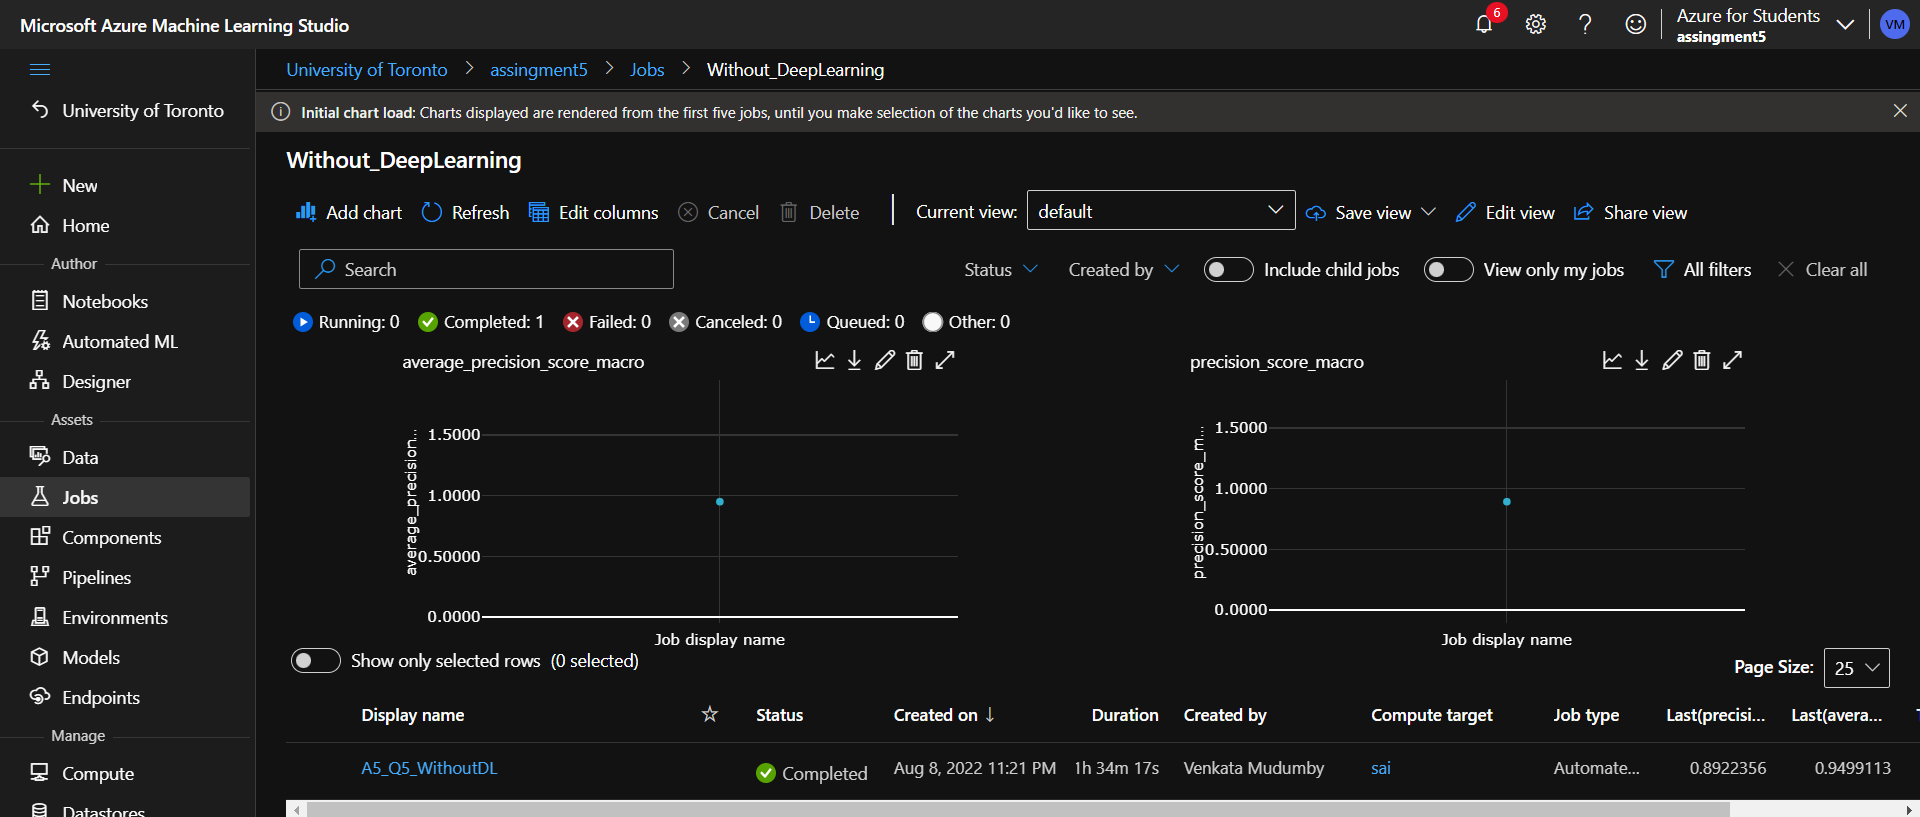

2. Data Check/Guardrails 

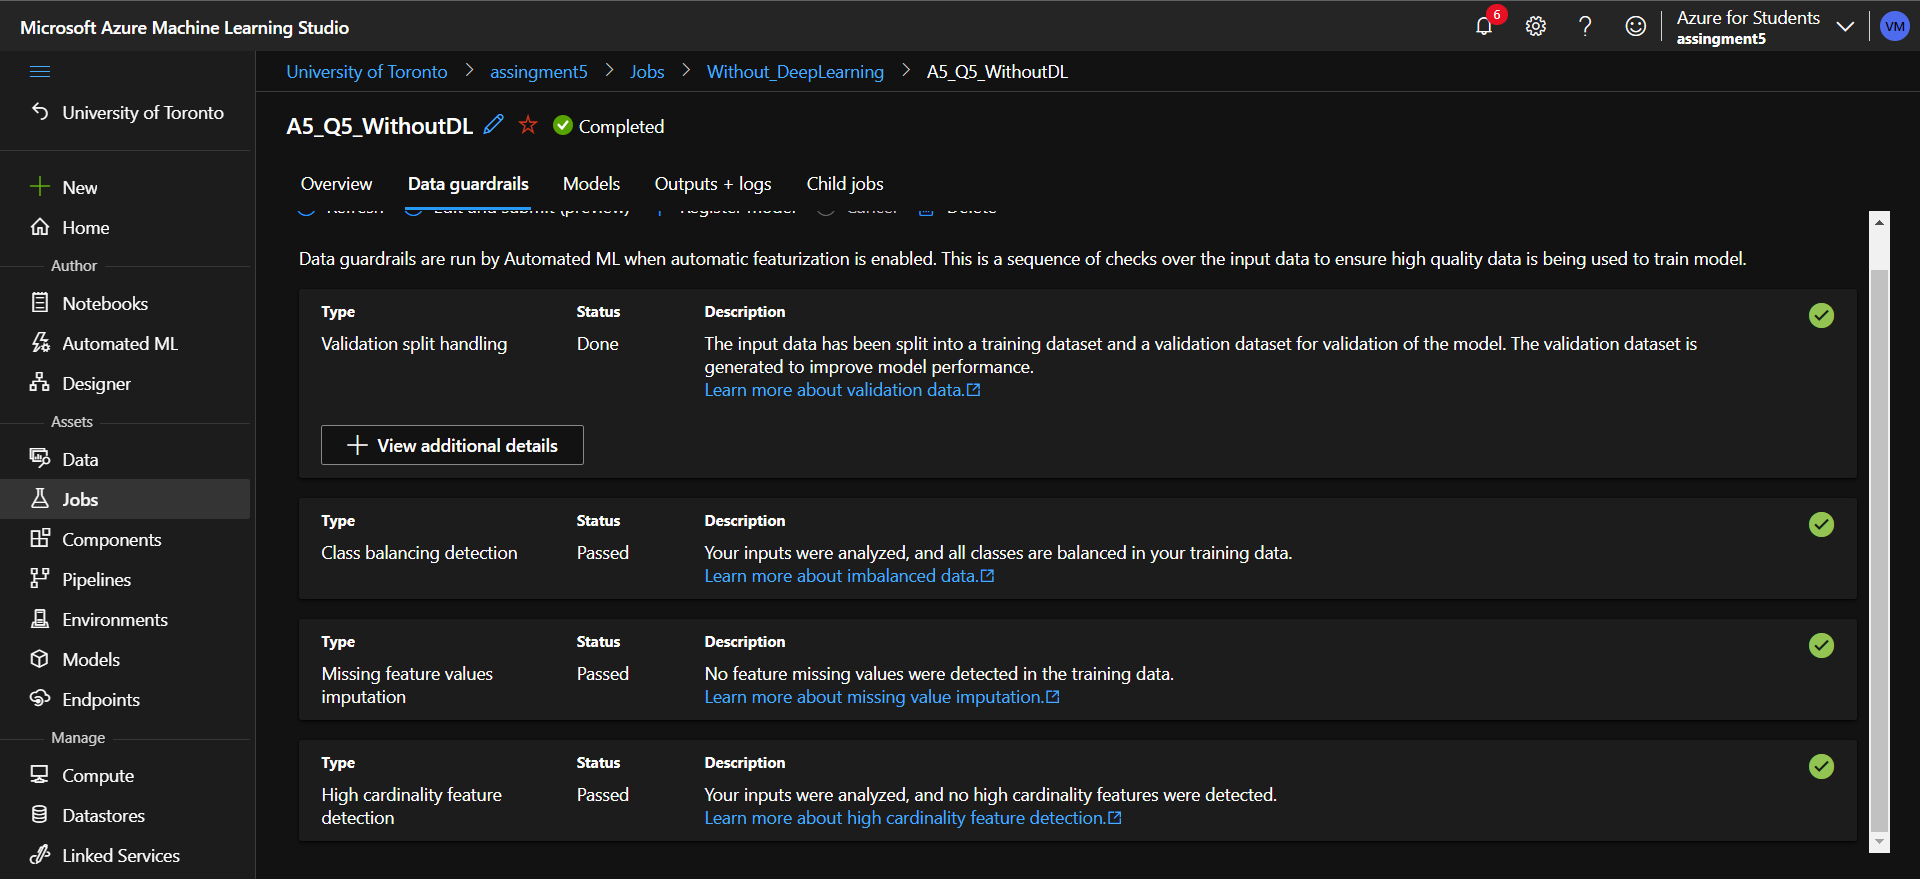

3. Model outputs of AutoML

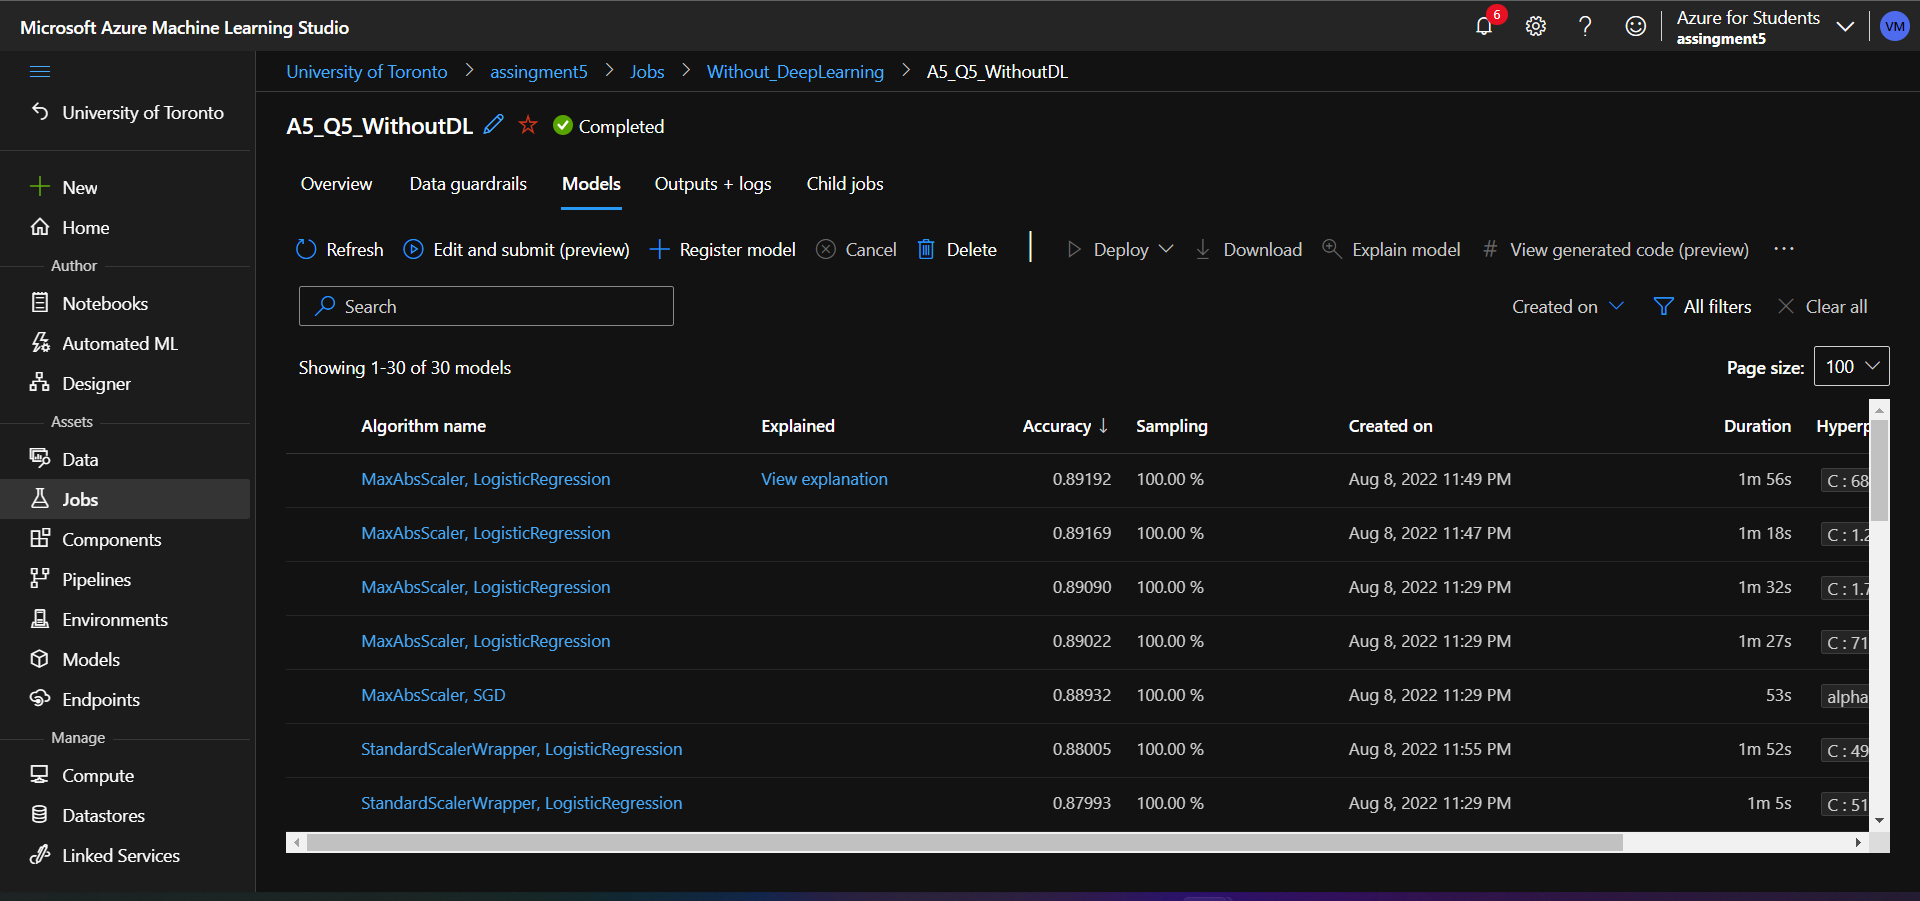

A total of 30 models were run by Azure ML with train: 60%, validation: 10%, test : 30%. The highest accuracy score was reached by Logisitic Regression using MaxAbsScaler Pre-processing. 

4. ROC Curve

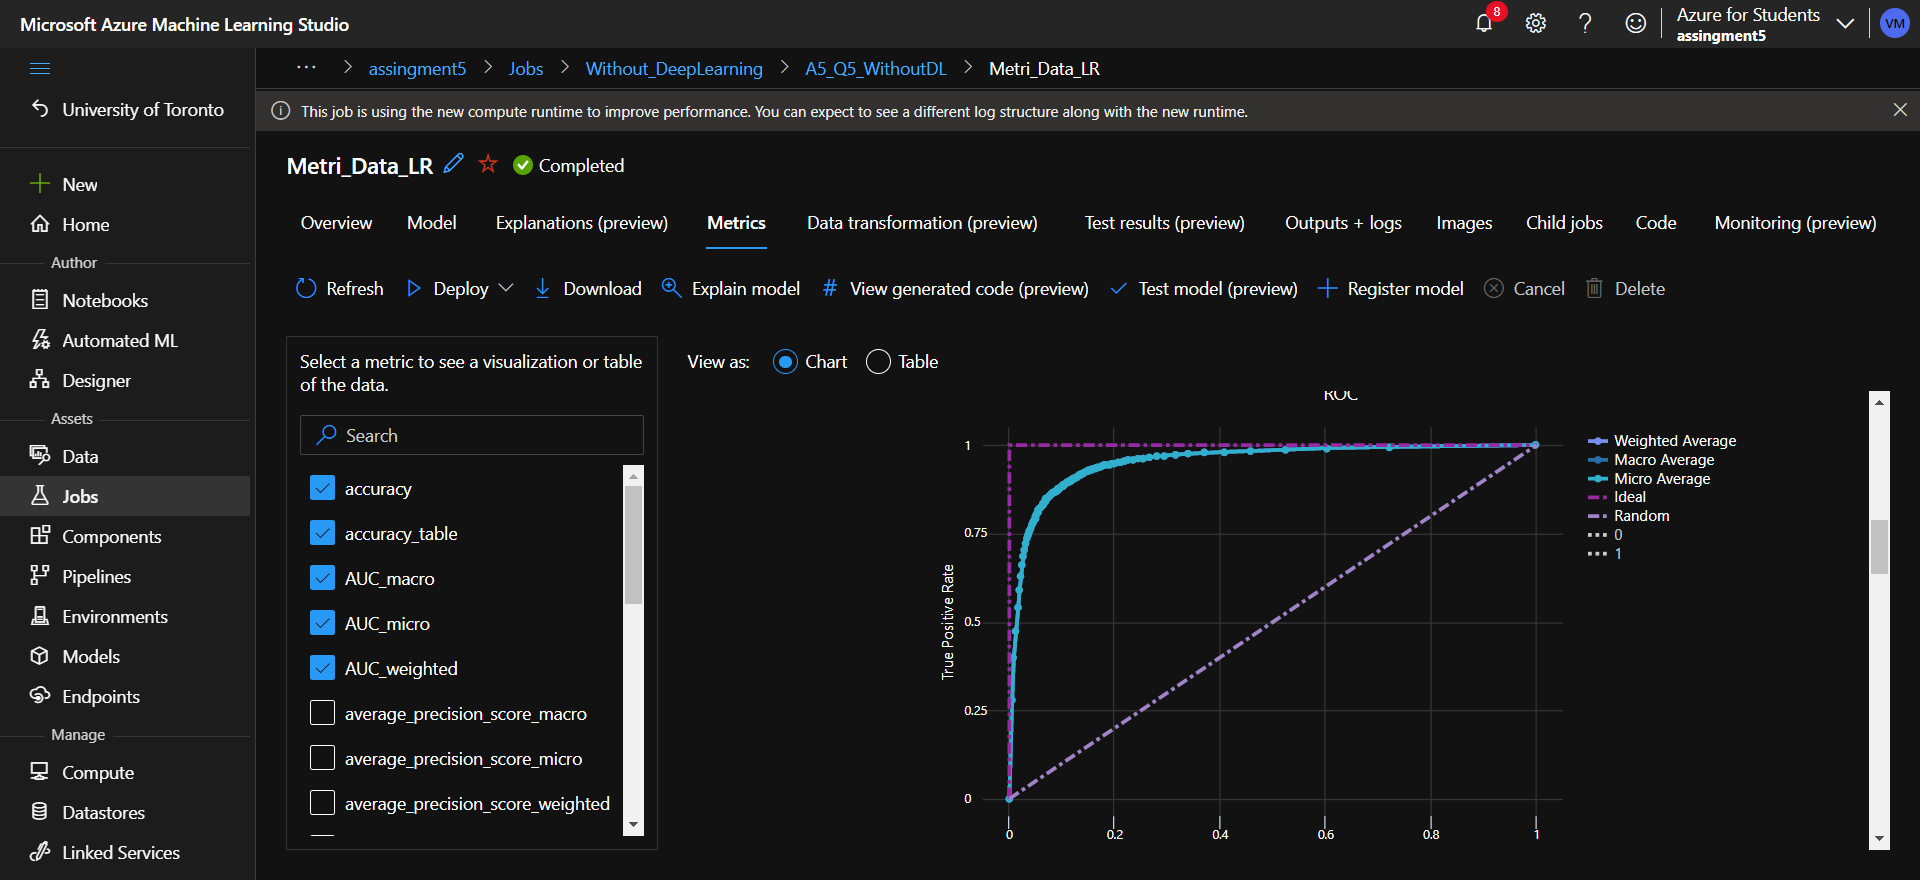

The ROC plot is indicates a good fit of our model. 

5. Confusion Matrix

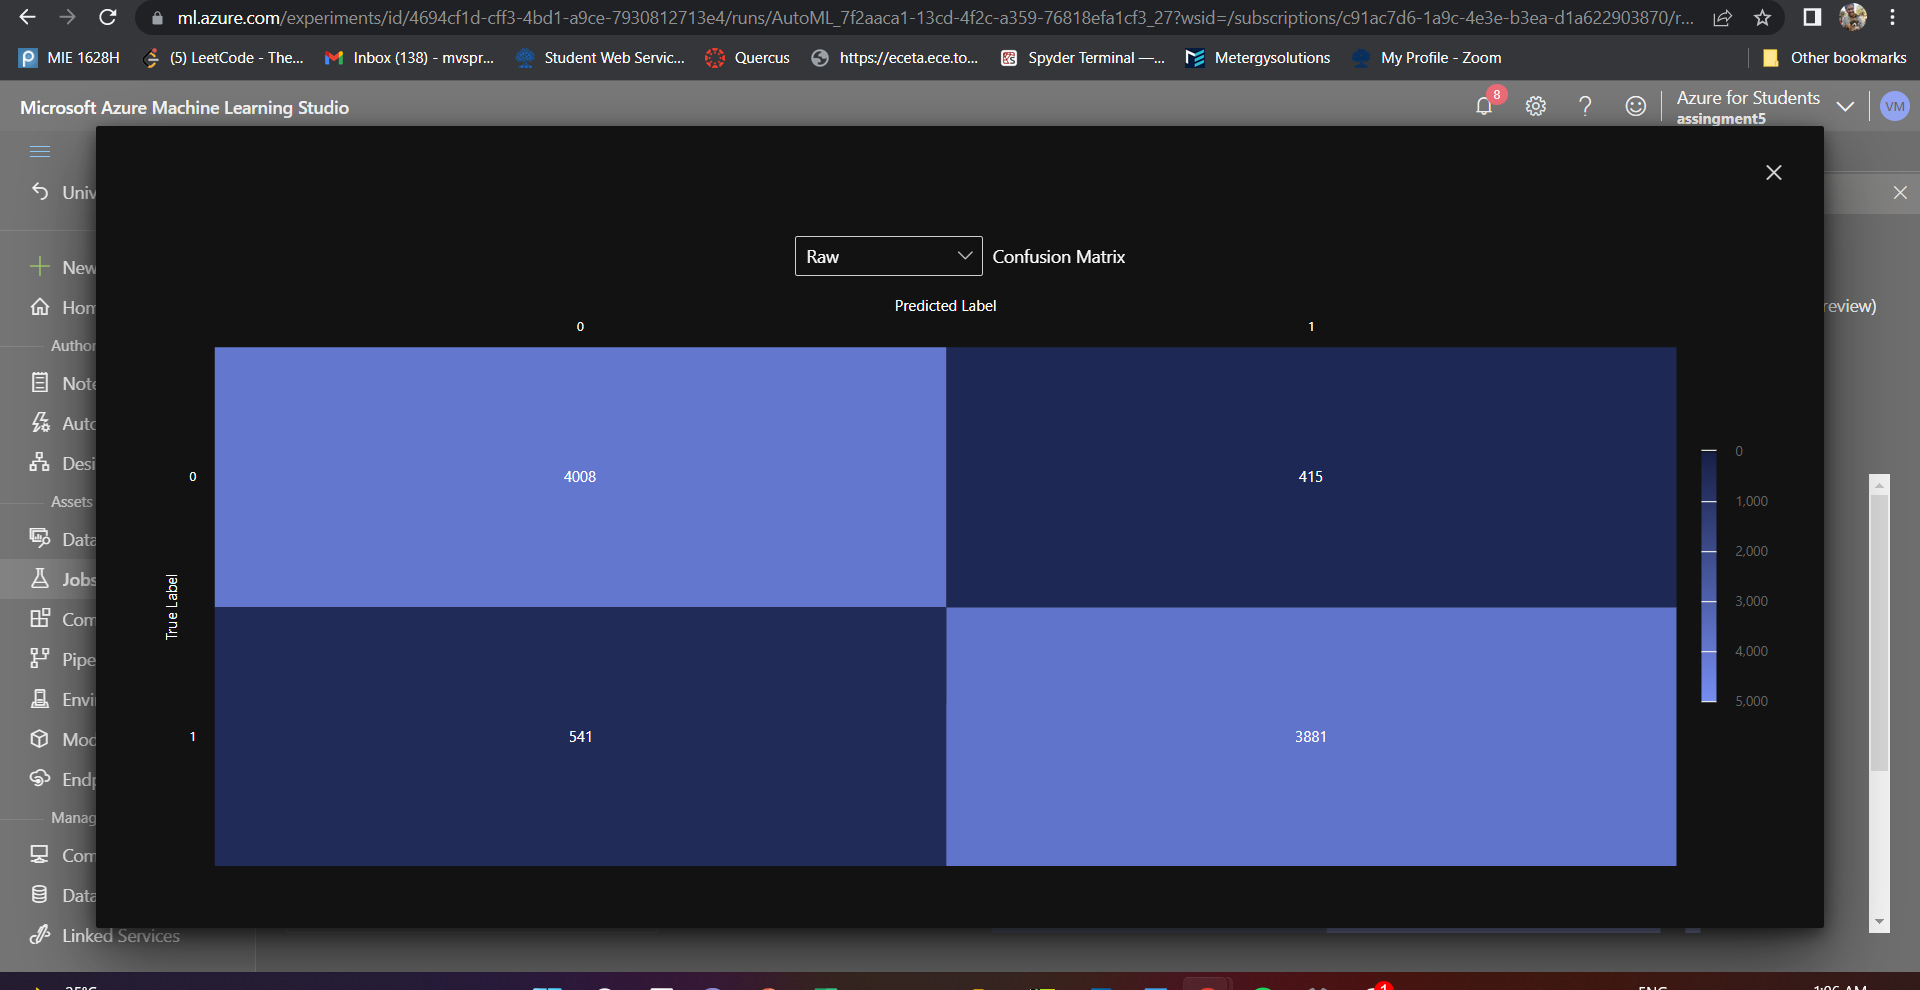

Confusion Matrix depicted above on the test set. 

7. Scores 

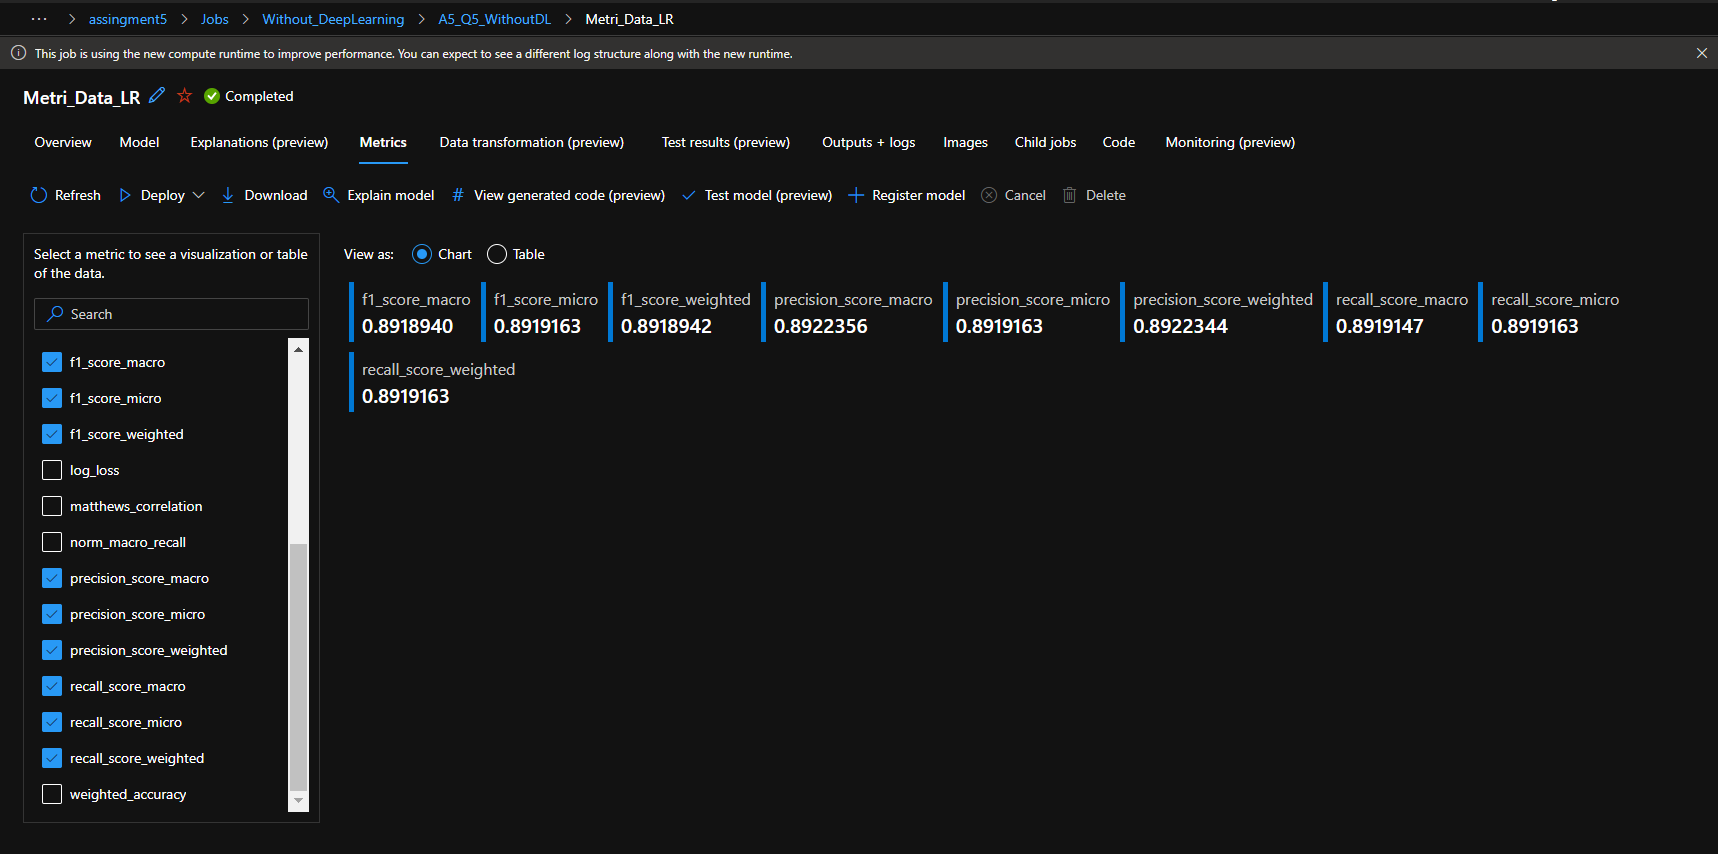

Scores are sligthly above the the RandomForest classifier but are within comporable range. It is not clear to me why it was giving micro, macro, wieghted even though our target is just a binary classification and not a multiclass classification. I could not find any option for binary in the ML studio at all even in the official documentation with  a binary classification task https://docs.microsoft.com/en-us/azure/machine-learning/tutorial-first-experiment-automated-ml auc_weighted was chosen.  

Based on defination and considering the fact our dataset is balanced, I think it is better to take macro scores into consideration as it just averages for classes.

6. HyperParameter used 

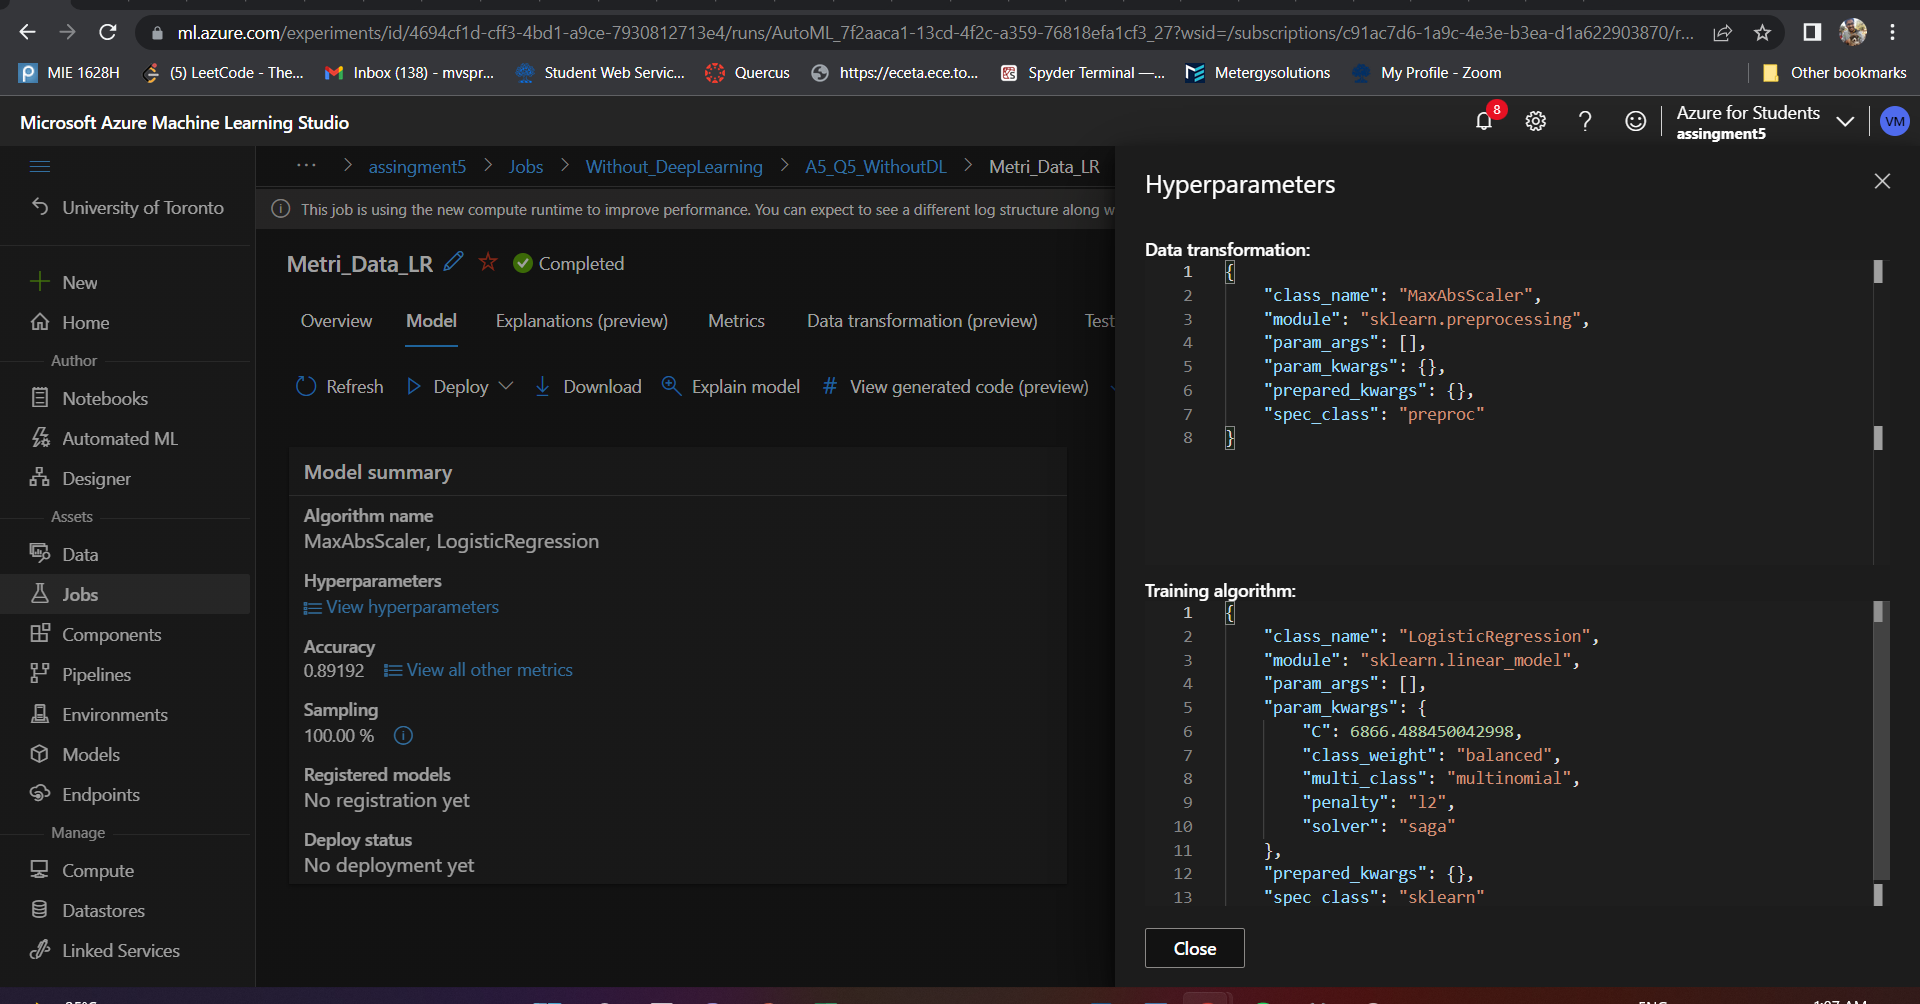

Screenshot giving the hyperparameters used by Aut oML. Again I am not sure why the AutoML used "multinomial" however I understand this is more treated for cross-entropy loss. 

7. Data Transformation done by Azure

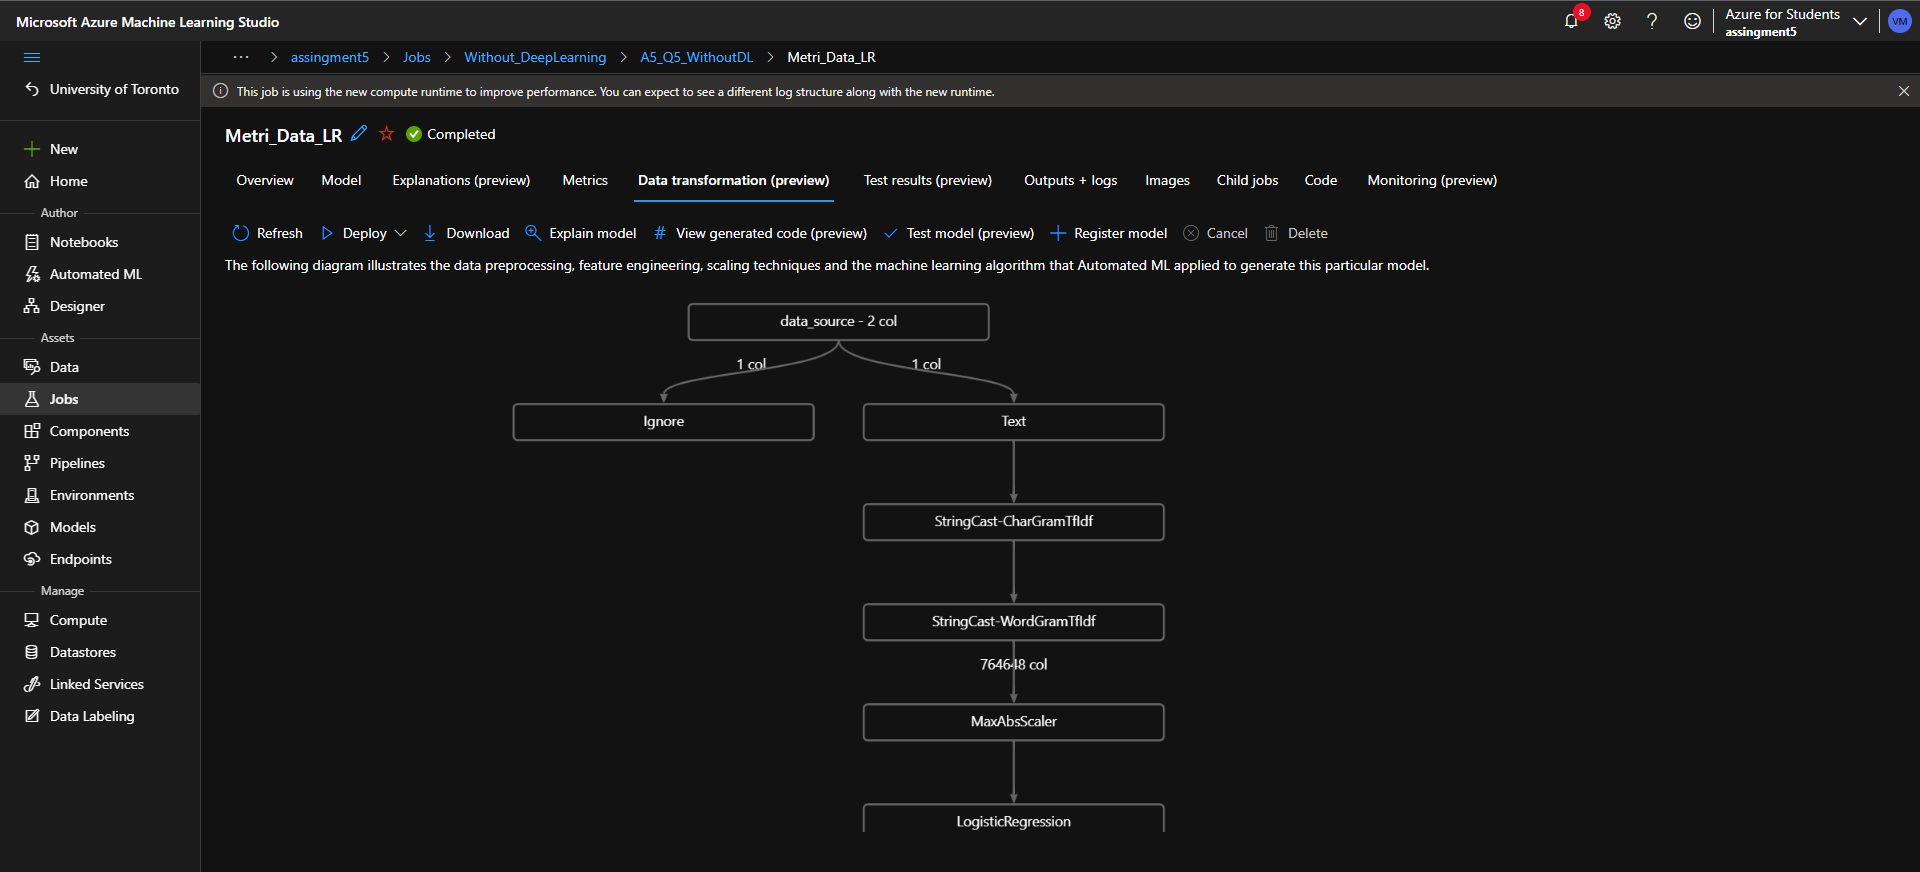

So azure relied of Tf-idf also. However it has done some more pre-processing as the sparse matrix has 76468 columns and used MaxAbsScaler to scale the sparse matrix.

# Let us see how the same model works on a reduced dataset features - we do not have 764648 columns!! 

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler

#fit the model and predict the output
max_abs_scaler=MaxAbsScaler()
X_train_maxabs=max_abs_scaler.fit_transform(X_train_down)
X_test_maxabs=max_abs_scaler.transform(X_test_down)
lr=LogisticRegression(penalty="l2",C=6866.488450042998,class_weight="balanced",multi_class="multinomial",solver="saga")
clf_lr = lr.fit(X_train_maxabs,Y_train_down)
pred_rf_down = clf_lr.predict(X_test_maxabs)
print("Accuracy: %s" % str(clf_lr.score(X_test_maxabs, Y_test_down)))
print("Confusion Matrix")
print(confusion_matrix(Y_test_down,pred_rf_down,))



Accuracy: 0.8179443887511212
Confusion Matrix
[[15652  3338]
 [ 3563 15353]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [103]:
from sklearn.metrics import * 
print('f1 score is',f1_score(Y_test_down,pred_rf_down))
print('recall score is',recall_score(Y_test_down,pred_rf_down))
print('precision score is',precision_score(Y_test_down,pred_rf_down))


f1 score is 0.8164969287632621
recall score is 0.8116409388877142
precision score is 0.8214113744582955


Logistic Regression performs much better than Naive Bayes done in Q4. The scores metrics are lower than random forest but the significant digits are comparable. We cannot compare this directly with Azure ML as the Azure has transformed to 764688 features whereas our corpus shape is just 27626 which is less than 50% sparse matrix values. 

Finally we have two models in comparison :

1. Our balanced datasetwith sparse matrix of 27626 columns giving best results with RandomForest with accuracy of 0.88

2. Balanced dataset fed to Azure AutoML generated a sparse matrix of 76468 columns giving best results with LogisiticRegression with accuracy of 0.89. 

3. Both provide near comparision results though Logisitic Regression has much better scores (f1,recall,precision) compared to randomforest 



What more can be done ? 

1. Enable Deep Learning and word embeddings and check if the results are any better. Neural networks can work much better on large scale data.  